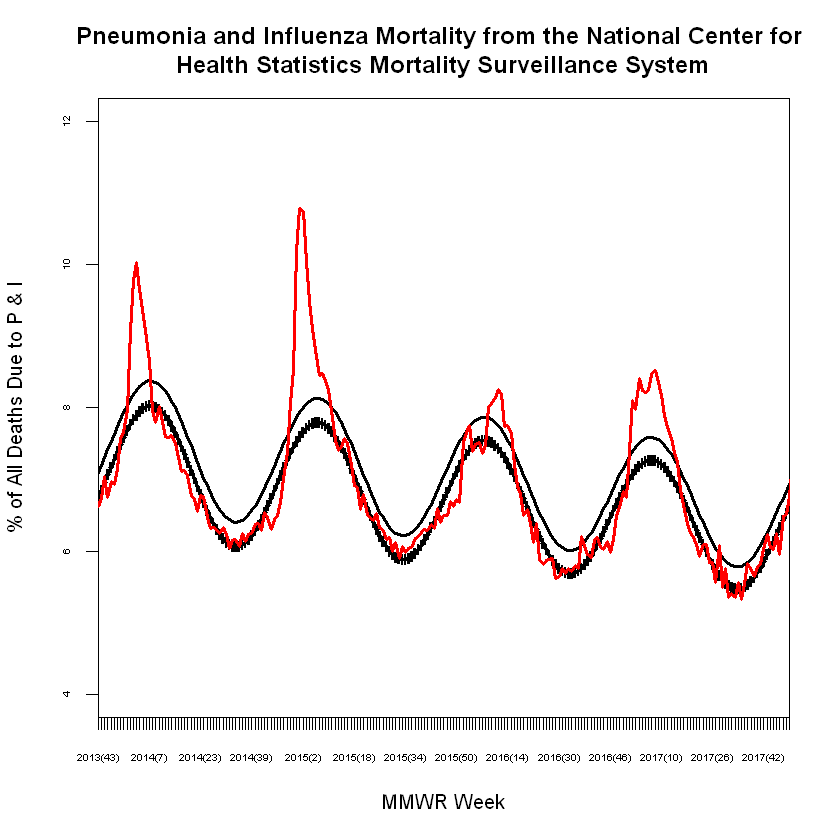

In [96]:
#Mortality

my_data <-read.csv(file = "NCHSData04.csv")
my_data$Year.Week <- paste(my_data$Year,"(" ,my_data$Week, ")")
my_data$Year.Week<-gsub(" ","",my_data$Year.Week)
x1 <- as.character(my_data$Year.Week)
x1 <- factor(x1, levels=unique(x1))
plot(x1, my_data$Expected, pch ='.',main = "Pneumonia and Influenza Mortality from the National Center for 
Health Statistics Mortality Surveillance System",type="n", xlim = c(220,420),ylim=c(4,12), 
     xlab="MMWR Week", ylab="% of All Deaths Due to P & I", lwd = 3, cex.axis= 0.5)
lines(x1, my_data$Expected,type="l",col="black", lwd = 3)
lines(x1, my_data$Threshold, type="l",col="black", lwd = 3)
lines(x1, my_data$Percent.of.Deaths.Due.to.Pneumonia.and.Influenza, type="l", col="red", lwd = 3)

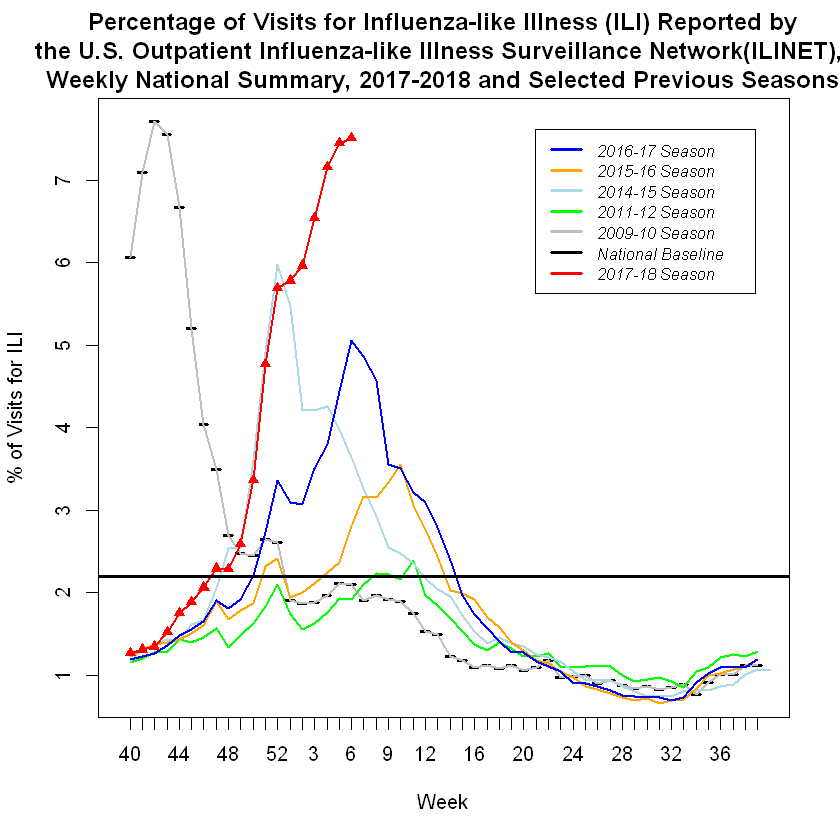

In [67]:
#Influenza-like illness

dv1 <- read.csv(file = "2009-10.csv", header = T)
dv2 <- read.csv(file = "2011-12.csv", header = T)
dv3 <- read.csv(file = "2014-15.csv", header = T)
dv4 <- read.csv(file = "2015-16.csv", header = T)
dv5 <- read.csv(file = "2016-17.csv", header = T)
dv6 <- read.csv(file = "2017-18.csv", header = T)
z<- list(dv1,dv2,dv3,dv4,dv5,dv6)
s1<- c("grey","green","lightblue","orange","blue","red")
temp <- as.character(dv1$WEEK)
temp<- factor(temp, levels=unique(temp))
plot(temp,dv1$WEIGHTED.ILI,main = "Percentage of Visits for Influenza-like Illness (ILI) Reported by
the U.S. Outpatient Influenza-like Illness Surveillance Network(ILINET), 
Weekly National Summary, 2017-2018 and Selected Previous Seasons",type="l",xlab="Week", ylab="% of Visits for ILI", lwd = 1)

for(i in 1:length(z)){
    week<-z[[i]]$WEEK
    wili<-z[[i]]$WEIGHTED.ILI
    week<- as.character(week)
    week<- factor(week, levels=unique(week))
    lines(week,wili, type="l",col=s1[[i]], lwd = 2)
}
lines(week,wili, type="o",pch = 17,col=s1[[i]], lwd = 2)
abline(h=2.2,col="black", lwd = 3)
legend("topright", inset=.05, c("2016-17 Season","2015-16 Season","2014-15 Season",
                                "2011-12 Season","2009-10 Season","National Baseline","2017-18 Season"), 
            col=c("blue","orange","lightblue","green","grey","black","red"), lwd = 3, lty=1:1, cex=0.8,text.font=3)


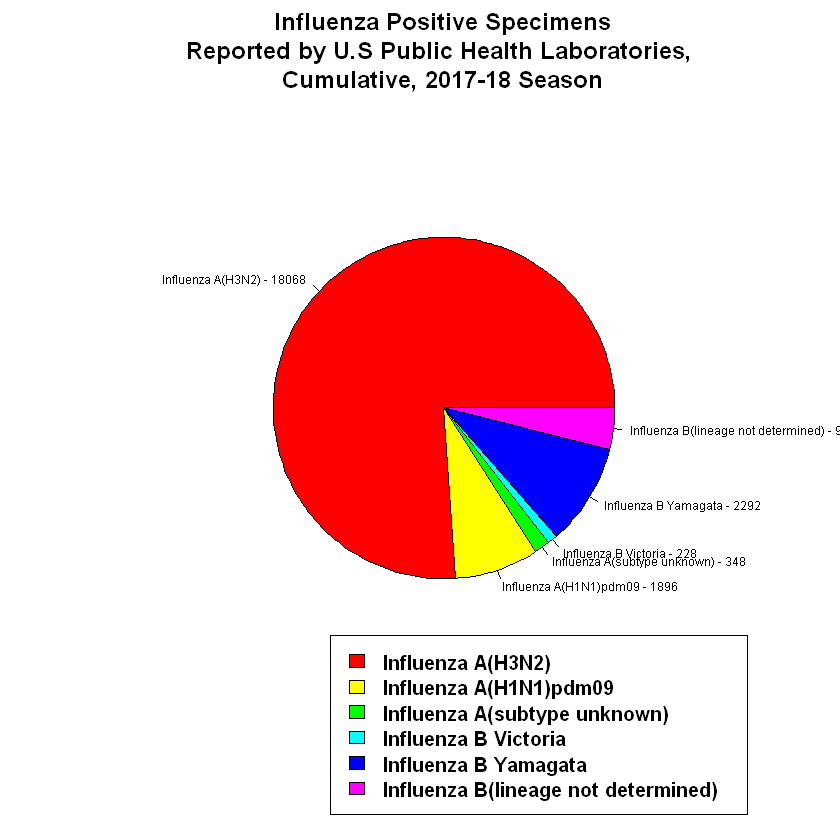

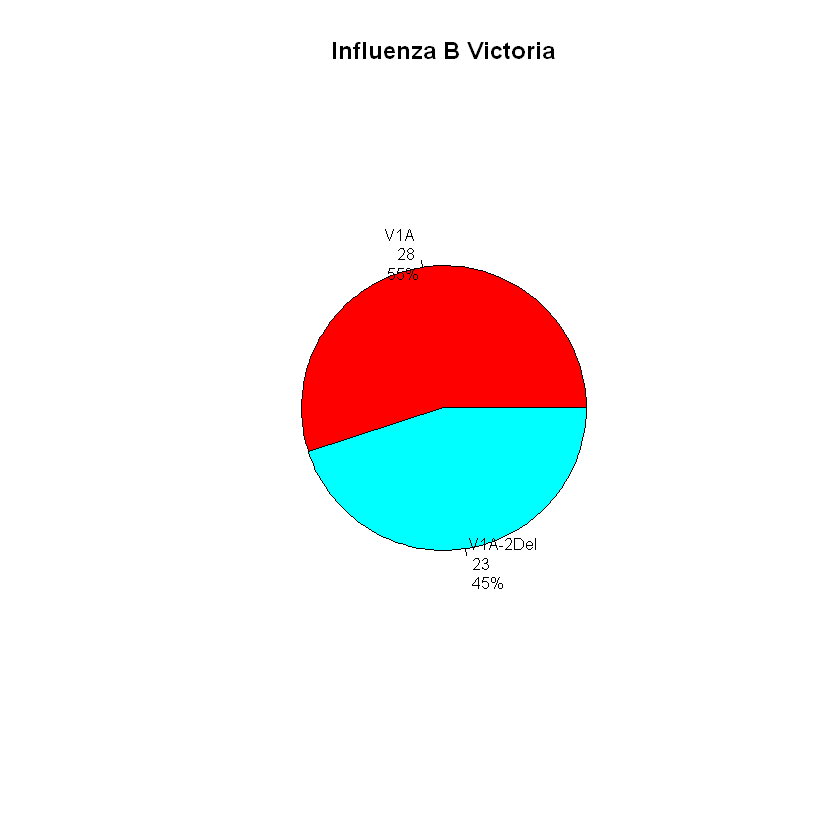

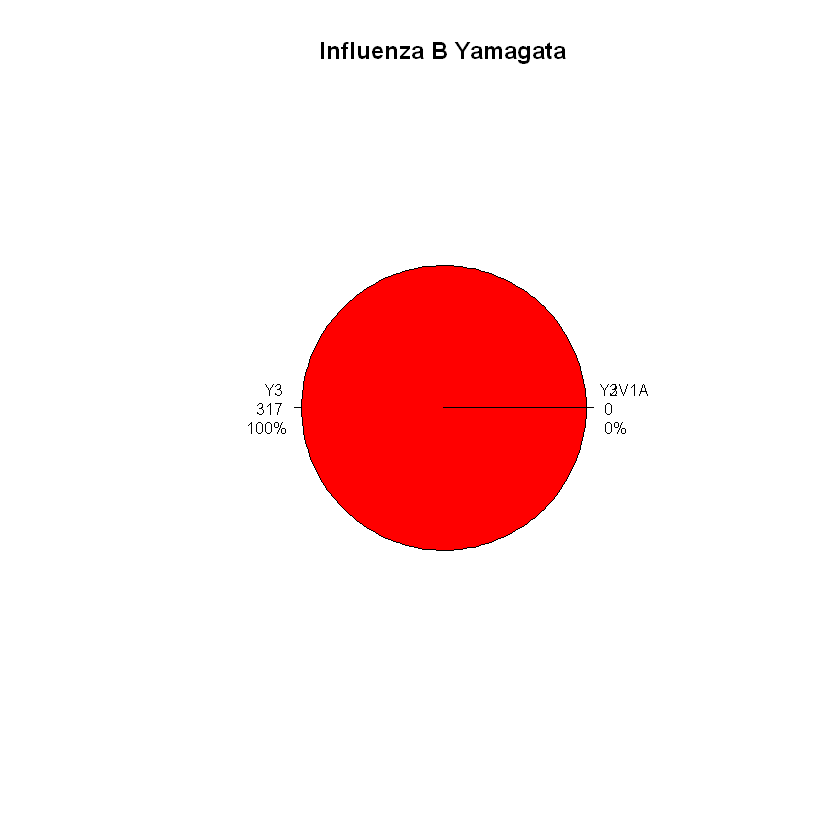

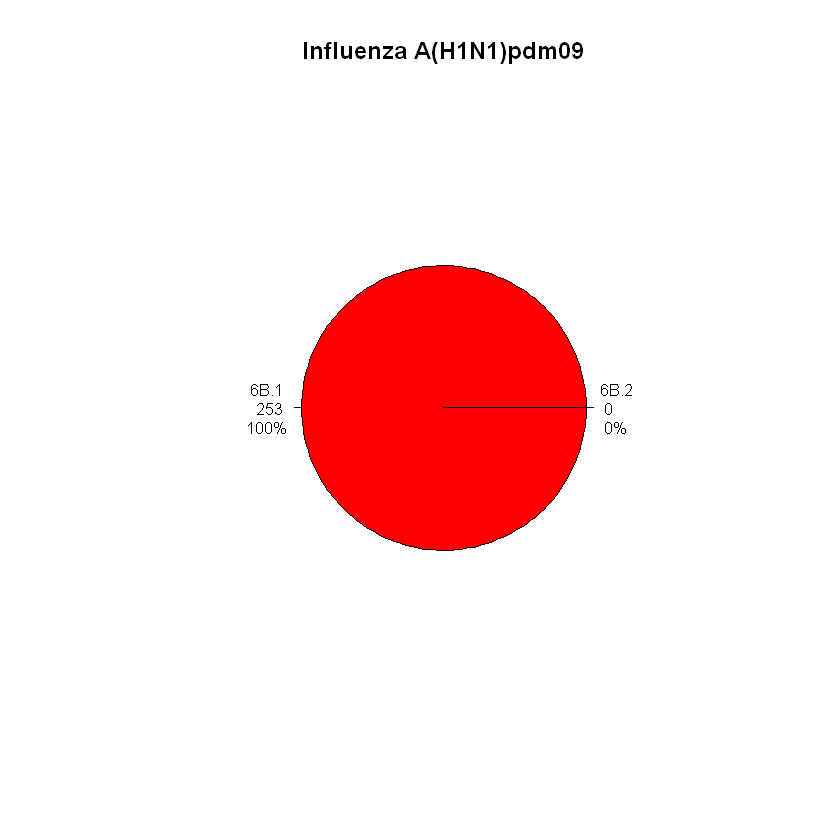

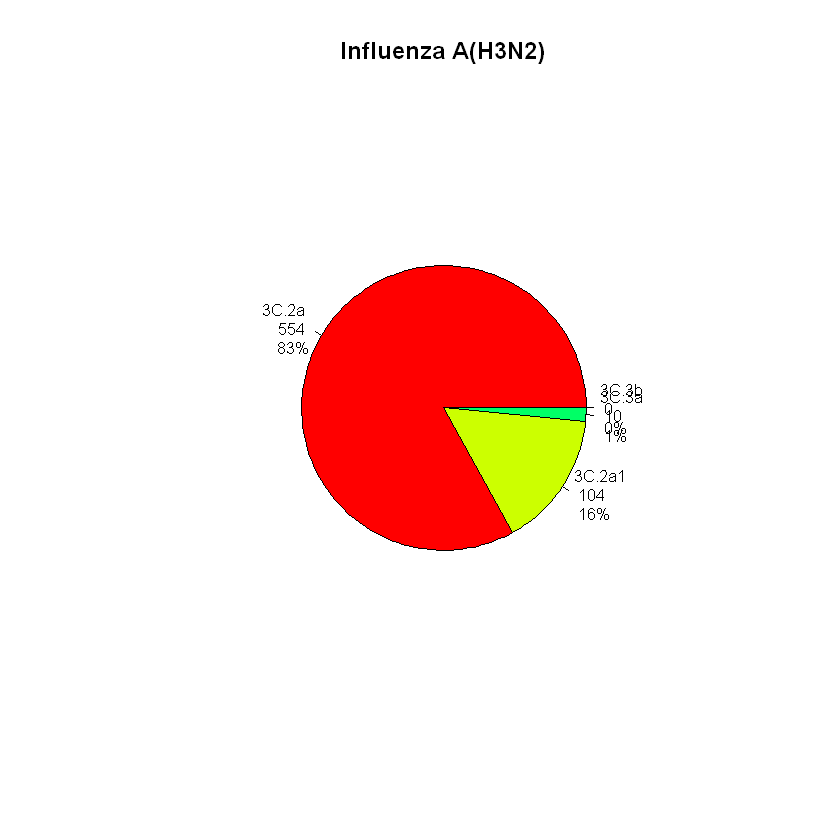

In [68]:
#Influenza sub-type pie-charts 

x <- read.csv(file = "Genetic04.csv")
f <- read.csv(file = "MainPieChart.csv")
myvalues <- c(sum(f$A.H3.),sum(f$A..H1N1.pdm09),sum(f$A.Subtyping.not.performed.),sum(f$B.Victoria),sum(f$B.Yamagata),sum(f$B))
namelist<- c("Influenza A(H3N2)","Influenza A(H1N1)pdm09", "Influenza A(subtype unknown)","Influenza B Victoria", 
             "Influenza B Yamagata", "Influenza B(lineage not determined)")
lbls <- paste(namelist,"-",myvalues)
pie(radius = 0.6, cex = 0.6, myvalues, labels = lbls, col = rainbow(length(myvalues)), main="Influenza Positive Specimens
Reported by U.S Public Health Laboratories, 
Cumulative, 2017-18 Season")
par(xpd=TRUE)
legend(-0.4,-0.8,namelist, fill=rainbow(length(myvalues)), text.font=2)

z<-c("Influenza B Victoria", "Influenza B Yamagata", "Influenza A(H1N1)pdm09", "Influenza A(H3N2)")
y<- split(x, x$X.Sub.type)
library(data.table)
w <- data.table(x)
r<-w[, sum(Number), by = X.Sub.type]
for(i in 1:length(y))
{
    slices <- y[[i]]$Number
    lbls <- y[[i]]$Genetic_Group
    pct <- round(slices/sum(slices)*100)
     lbls <- paste(lbls,"\n",slices)
    lbls <- paste(lbls, "\n",pct) 
    lbls <- paste(lbls,"%",sep="")
    pie(radius = 0.5, cex = 0.8,slices,labels = lbls, col=rainbow(length(lbls)), main=z[[i]])
}

Warning message:
"Ignoring unknown aesthetics: x, y"

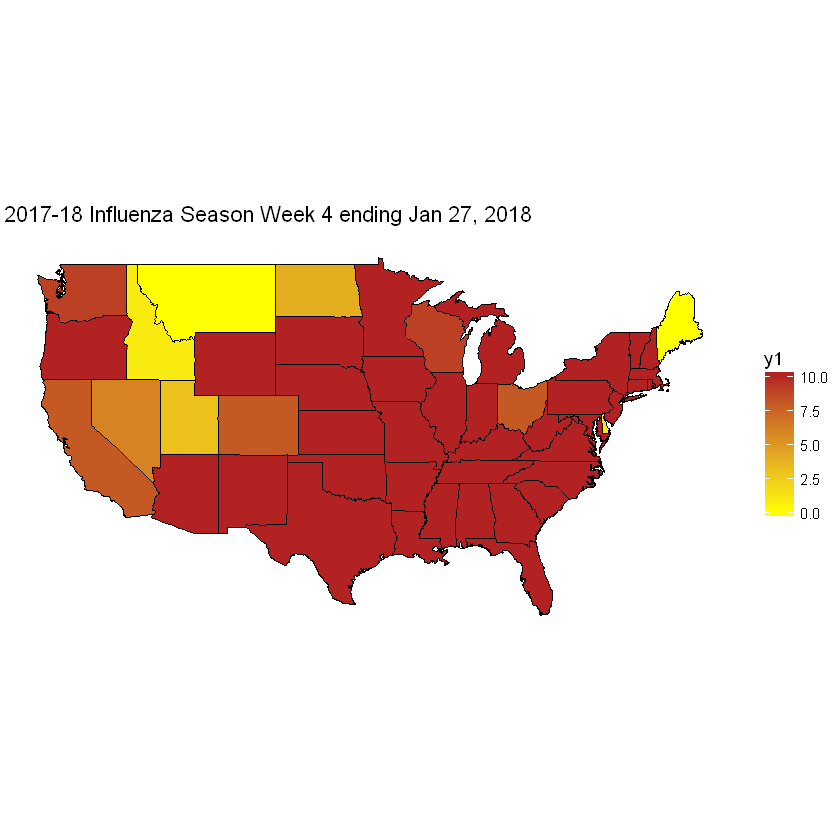

In [79]:
#Flu heat map of USA

x1<- read.csv(file = "StateDataforMap_2017-18week4.csv")
x1$Val<- gsub("Level ","", x1$ACTIVITY.LEVEL)
y1<-as.numeric(x1$Val)
library(ggplot2)
library(dplyr)
library(maps)
us <- map_data("state")
z <- ggplot() + geom_map(data=us, map=us,
                    aes(x=long, y=lat, map_id=region),
                    fill="#ffffff", color="#ffffff", size=0.5)
z <- z + geom_map(data=x1, map=us,
                    aes(fill=y1, map_id=tolower(STATENAME)),
                    color="#000000", size=0.5)
z <- z + scale_fill_continuous(low='yellow', high='firebrick', 
                                 guide='colorbar')
z<- z + ggtitle("2017-18 Influenza Season Week 4 ending Jan 27, 2018")
z <- z + labs(x="", y="") + coord_map("mercator") + theme_void()
z

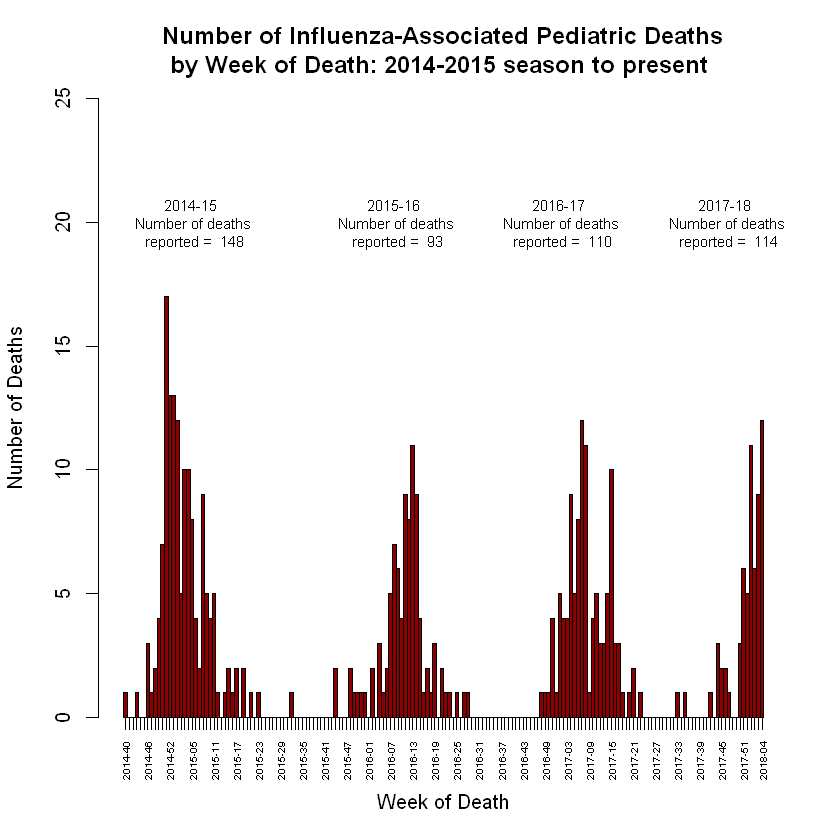

In [92]:
#Pediatric Deaths
library(dplyr)
x<- read.csv(file = "PedFluDeath_WeeklyData.csv")
g<-read.csv(file = "HeaderData.csv")
r<- paste(g$SEASON,"\nNumber of deaths\n reported = ",g$TOTAL.DEATHS)
temp <- as.character(x$WEEK.NUMBER)
for(i in 1:length(temp)){
    if(i %% 6!=1 && i!=length(temp)){
    temp[[i]] <- ""
    }
}
v<-as.numeric(x$PREVIOUS.WEEKS.DEATHS)
my_data<-data_frame(temp,v)
g<-as.matrix(sapply(v, as.numeric))  
b<-barplot(g, beside = T, col = "darkred", main = "Number of Influenza-Associated Pediatric Deaths
by Week of Death: 2014-2015 season to present ",xlab = "Week of Death", ylab = "Number of Deaths", ylim = range(0,25))
text(20,20,r[1],cex = 0.75)
text(75,20,r[2],cex = 0.75)
text(120,20,r[3],cex = 0.75)
text(165,20,r[4],cex = 0.75)
axis(1, at=b, labels=temp, las=2, cex.axis = 0.5)
